# Minshu Dubey

# Project 3

In this project, you will be using the CIFAR-10 dataset (http://www.cs.toronto.edu/~kriz/cifar.html (Links to an external site.)) which consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

The dataset is divided into five training batches and one test batch, each with 10,000 images. The test batch contains exactly 1,000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5,000 images from each class.

# Your task is to create and submit a well-documented Jupyter notebook report with the following features:
# a) It performs dimension-reduction (e.g. t-SNE, PCA), and scaling when and if necessary along with justification for each action and comparison of results
# b) It uses appropriate multiclass classifiers such SVM, Random Forest, K-Nearest Neighbors, etc. comparing ROC curves for the classifiers
# c) It computes the performance parameters such as confusion matrix, sensitivity, and specificity
# d) Plots sensitivity and specificity against the number of folds (pick reasonable values for k) in k-fold cross-validation
# e) It identifies and thoroughly discusses the best classifier based on the obtained results


Setup First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Loading data using KERAS
Keras offers convenient facilities that automatically download some well-known datasets and store them in the ~/.keras/datasets directory. Let's load the CIFAR-10 in Keras:

In [4]:

import tensorflow as tf
import tensorflow_datasets as tfds
from keras.datasets import cifar10
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 3s 0us/step


# Summarizing loading dataset 
Plotting some images

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


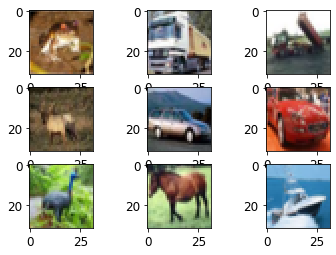

In [5]:
from matplotlib import pyplot
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

# SCALING

In [0]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [7]:
x_train.shape

(50000, 3072)

In [8]:
x_test.shape

(10000, 3072)

#USING PCA
for dimension reduction 

In [9]:
pca = PCA()
pca.fit_transform(x_train)

array([[-1.63225950e+03,  6.95904885e+02,  3.82936183e+02, ...,
        -1.94383396e-01, -2.96716275e-01, -8.91909421e-02],
       [ 2.11594763e+02, -2.42235521e+02,  1.53095691e+03, ...,
         2.76508201e-02,  1.47062424e-01, -1.96606511e-01],
       [ 1.97120094e+03, -2.93813609e+03, -7.02173229e+02, ...,
        -2.66373278e-01, -5.45969636e-02, -1.00334729e-01],
       ...,
       [ 1.80373380e+02, -2.89234292e+03, -1.00448294e+02, ...,
        -9.69870999e-02,  4.75402487e-01,  3.69202335e-01],
       [ 2.89881680e+03, -8.60874301e+02,  1.41938040e+03, ...,
        -1.19109692e-01,  1.89968105e-01, -4.26015893e-01],
       [ 1.06916310e+03, -3.01968063e+02, -1.13372056e+03, ...,
         2.46831906e-01,  6.12928127e-02, -7.15290870e-03]])

In [10]:

pca.explained_variance_.shape

(3072,)

In [11]:

# Calculating optimal k to have 95% (say) variance 

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
k

658

In [0]:
## Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# CLASSIFIERS

# Prediction using Random Forest

In [13]:
## Training
rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
## Predicting
y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
random_forest_score

0.3857

**Got an accuracy of 38% with Random forest**

# Prediction using KNN

In [15]:
## Training 
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
## Predicting
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

0.1424

**Got an accuracy of 14% with KNN **

# Prediction using Logistic Regression

In [21]:
## Training 
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
## Predicting
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

0.403

**Got an accuracy of 40% with Logistic Regression**

# Prediction using SVM

In [0]:
## Training
svc = svm.SVC()
svc.fit(x_train_pca, y_train)

In [23]:

## Predicting 
y_pred_svm = svc.predict(x_test_pca)
svc_score = accuracy_score(y_test, y_pred_svm)
svc_score

0.4824

# Comparing  various Classifier

In [24]:
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)

RandomForestClassifier :  0.3907
K Nearest Neighbors :  0.1416
Logistic Regression :  0.4035
Support Vector Classifier :  0.4824


#Truns out that SVC is best classifier till now with 48% of accuracy

# Implementing Neural Network

In [25]:

## Creating a model

from keras.models import Sequential
model = Sequential()

In [26]:

from  keras.layers  import Dense

# For first layer, input shape must be supplied
layer1 = Dense(units = 50, activation = 'relu', input_dim = k)
model.add(layer1)

layer2 = Dense(units = 25, activation = 'relu')
model.add(layer2)

layer3 = Dense(units = 10, activation = 'sigmoid')
model.add(layer3)

In [27]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
## Onehot Encoding the labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

y_train_encoded = enc.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = enc.transform(y_test.reshape(-1, 1))

In [30]:

model.fit(x_train_pca, y_train_encoded, epochs=20)




Epoch 1/20





50000/50000 [==============================] - 4s 87us/step - loss: 0.3071 - acc: 0.8944
Epoch 2/20
50000/50000 [==============================] - 3s 70us/step - loss: 0.2460 - acc: 0.9093
Epoch 3/20
50000/50000 [==============================] - 4s 70us/step - loss: 0.2279 - acc: 0.9140
Epoch 4/20
50000/50000 [==============================] - 4s 72us/step - loss: 0.2146 - acc: 0.9178
Epoch 5/20
50000/50000 [==============================] - 3s 70us/step - loss: 0.2043 - acc: 0.9214
Epoch 6/20
50000/50000 [==============================] - 4s 70us/step - loss: 0.1956 - acc: 0.9243
Epoch 7/20
50000/50000 [==============================] - 3s 70us/step - loss: 0.1894 - acc: 0.9264
Epoch 8/20
50000/50000 [==============================] - 3s 68us/step - loss: 0.1838 - acc: 0.9285
Epoch 9/20
50000/50000 [==============================] - 3s 70us/step - loss: 0.1790 - acc: 0.9305
Epoch 10/20
50000/50000 [==============================] - 3s 69us/step - loss: 0.1750 - acc

In [0]:
predictions = model.predict(x_test_pca)

In [0]:

predictions_decoded = []

for x in predictions:
    for i in range(x.shape[0]):
        if x[i] == max(x):
            predictions_decoded.append(i)
            break

# Export best prediction

In [0]:
np.savetxt("predictions.csv", labels, fmt = '%s')

In [37]:
accuracy_score(y_test, predictions_decoded)

0.4333

**With onehot_encoder to accuracy goes around 43%**

# Confusion Matrix 

In [0]:
#Binary Classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train, y_train_5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
some_image=x_train[0]
sgd_clf.predict([some_image])

array([ True])

In [0]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x_train, y=None):
        pass
    def predict(self, x_train):
        return np.zeros((len(x_train), 1), dtype=bool)

In [35]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.90526189, 0.89638207, 0.89835593])

**Doing confusion matrix with logistic regression as svm is taking a lot of time and its second best classifier with accuracy after that.**

In [36]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(lr, x_train, y_train_5, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train-5, y_train_pred) #taking all the 10 labels against each other for confusion matrix

array([[4661,  339,    0,    0,    0,    0,    0,    0,    0,    0],
       [4912,   88,    0,    0,    0,    0,    0,    0,    0,    0],
       [4932,   68,    0,    0,    0,    0,    0,    0,    0,    0],
       [4958,   42,    0,    0,    0,    0,    0,    0,    0,    0],
       [4969,   31,    0,    0,    0,    0,    0,    0,    0,    0],
       [4958,   42,    0,    0,    0,    0,    0,    0,    0,    0],
       [4916,   84,    0,    0,    0,    0,    0,    0,    0,    0],
       [4928,   72,    0,    0,    0,    0,    0,    0,    0,    0],
       [4761,  239,    0,    0,    0,    0,    0,    0,    0,    0],
       [4953,   47,    0,    0,    0,    0,    0,    0,    0,    0]])

In [39]:
y_train_perfect_predictions = y_train  # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[5000, 5000, 5000, 5000, 5000,    0, 5000, 5000, 5000, 5000],
       [   0,    0,    0,    0,    0, 5000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

Precision score

In [40]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.32224334600760457

Recall Score

In [42]:
recall_score(y_train_5, y_train_pred)

0.0678

In [43]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.11202908129543952

In [45]:
y_scores = sgd_clf.decision_function([some_image])
y_scores

array([18533.16021763])

In [0]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [47]:
y_some_digit_pred

array([ True])

In [48]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred


array([ True])

Doing cross validation.

In [55]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving figure precision_recall_vs_threshold_plot


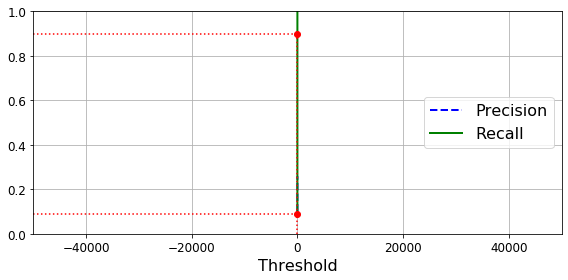

In [62]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.25)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.25)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [63]:
(y_train_pred == (y_scores > 0)).all()

False

Saving figure precision_vs_recall_plot


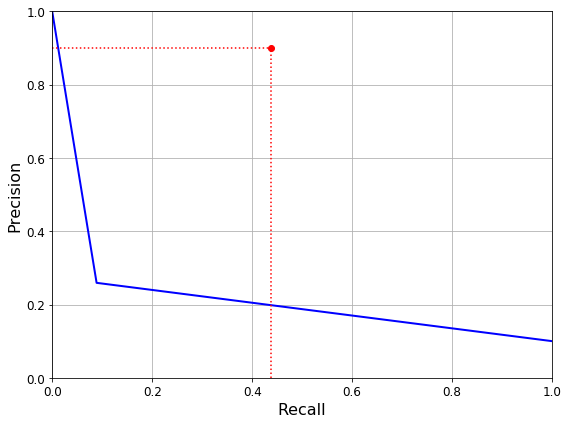

In [64]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [0]:
threshold_20_precision = thresholds[np.argmax(precisions >= 0.20)]

In [66]:
threshold_20_precision

True

In [0]:
y_train_pred_20 = (y_scores >= threshold_20_precision)

In [68]:
precision_score(y_train_5, y_train_pred_20)

0.2591943957968476

In [69]:
recall_score(y_train_5, y_train_pred_20)

0.0888

# ROC Curve

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


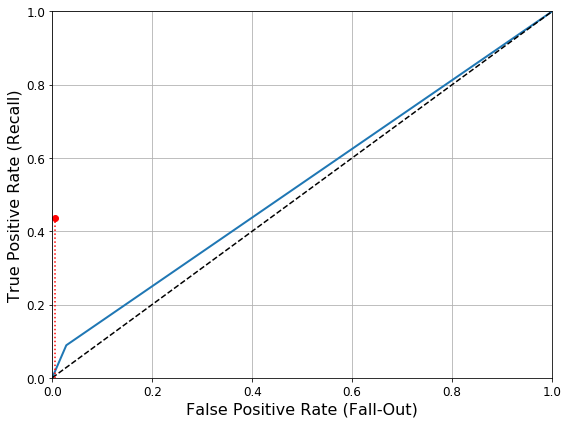

In [71]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
save_fig("roc_curve_plot")                         # Not shown
plt.show()

In [72]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.5303